In [2]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.signal as sig
import scipy.optimize as opt
import scipy.integrate as integ

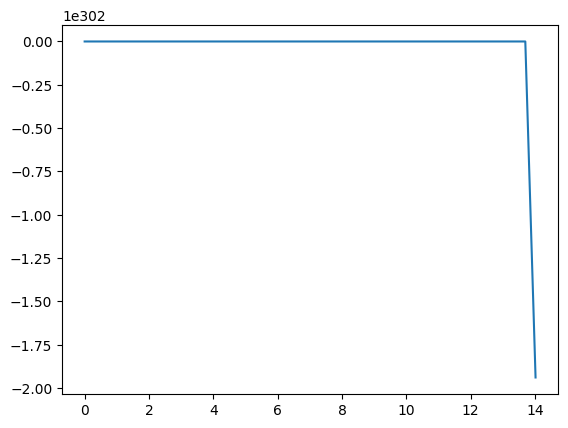

In [ ]:
k = 10
alpha = 1
m = 1
b = 50

num = [1]
den = [m, -b, -(k+alpha)]
sys = ct.tf(num, den)

t, y = ct.step_response(sys)

plt.plot(t, y)

Controller gains: Kp = 806.33, Kd = 38.00
Closed-loop poles: [-20.+20.40408122j -20.-20.40408122j]
Settling time: 0.200 s


/var/folders/xh/qybhtmcs79d8y9v846x9tt540000gn/T/ipykernel_85119/4075189763.py:17: RuntimeWarning: invalid value encountered in sqrt
  p1 = -zeta*wn + wn*np.sqrt(zeta**2 - 1)*1j
/var/folders/xh/qybhtmcs79d8y9v846x9tt540000gn/T/ipykernel_85119/4075189763.py:18: RuntimeWarning: invalid value encountered in sqrt
  p2 = -zeta*wn - wn*np.sqrt(zeta**2 - 1)*1j


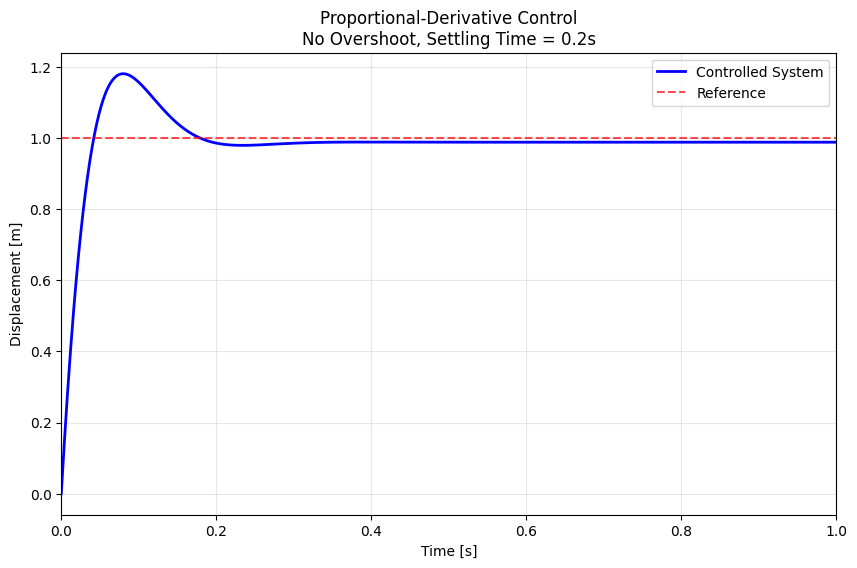

In [13]:
m = 1.0
b = 2.0
k = 10.0

# Plant: G(s) = 1/(ms² + bs + k)
plant = ct.tf([1], [m, b, k])

# Design requirements: no overshoot, settling time = 0.2s
# For no overshoot: ζ ≥ 1 (critically damped or overdamped)
# For settling time = 0.2s: 4/(ζωₙ) = 0.2 → ζωₙ = 20
# Choose ζ = 1.2, ωₙ = 20/1.2 = 16.67

zeta = 0.7
wn = 20/zeta

# Desired closed-loop poles
p1 = -zeta*wn + wn*np.sqrt(zeta**2 - 1)*1j
p2 = -zeta*wn - wn*np.sqrt(zeta**2 - 1)*1j

# Proportional gain for desired poles
# Closed-loop: 1 + Kp*G(s) = 0
# s² + (b+Kp)/m * s + (k+Kp)/m = 0
# Compare with desired: s² + 2ζωₙs + ωₙ² = 0

Kp = m*wn**2 - k
Kd = 2*m*zeta*wn - b

# PD controller: C(s) = Kp + Kd*s
controller = ct.tf([Kd, Kp], [1])

# Closed-loop system
cl_sys = ct.feedback(controller*plant, 1)

# Step response
t = np.linspace(0, 1, 1000)
t_cl, y_cl = ct.step_response(cl_sys, t)

plt.figure(figsize=(10, 6))
plt.plot(t_cl, y_cl, 'b-', linewidth=2, label='Controlled System')
plt.axhline(y=1, color='r', linestyle='--', alpha=0.7, label='Reference')
plt.grid(True, alpha=0.3)
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m]')
plt.title('Proportional-Derivative Control\nNo Overshoot, Settling Time = 0.2s')
plt.legend()
plt.xlim(0, 1)

print(f"Controller gains: Kp = {Kp:.2f}, Kd = {Kd:.2f}")
print(f"Closed-loop poles: {np.roots(cl_sys.den[0][0])}")
print(f"Settling time: {4/(zeta*wn):.3f} s")
